# Tähtien (good/poor review) ennustaminen tekstistä

## Tietojen luku sisään

In [2]:
import pickle

In [3]:
with open("random_reviews.p","rb") as f:
    random_reviews = pickle.load( f )

with open("bow1000.p","rb") as f:
    bow1000 = pickle.load( f )

FileNotFoundError: [Errno 2] No such file or directory: 'random_reviews.p'

In [3]:
random_reviews_staranalysis = get_training_portition_of_the_data(random_reviews)
bow1000_staranalysis = get_training_portition_of_the_data(bow1000) 

palautetaan 800 riviä yhteensä 1000 rivistä (osuus 0.8)
palautetaan 800 riviä yhteensä 1000 rivistä (osuus 0.8)


## Testit

### Generate a “wordcloud" plot for 100 most frequent words of the selected 

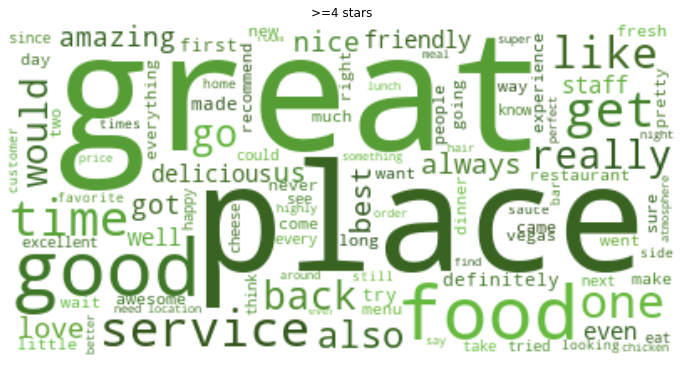

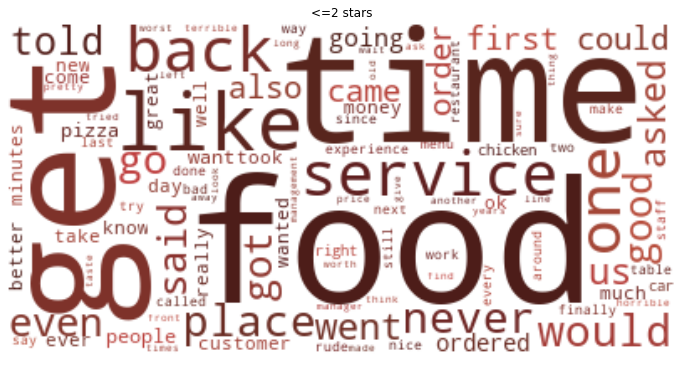

In [4]:
drawWordCloud(bow1000_staranalysis.loc[random_reviews_staranalysis['stars'] >= 4], ">=4 stars", color="green")
drawWordCloud(bow1000_staranalysis.loc[random_reviews_staranalysis['stars'] <= 2], "<=2 stars", color="red")

## Testind binary classification methods of scikit-learn
Predict the label (good or poor) of a review based on the review text

In [5]:
random_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,category
0,KW5edXlPGeZ0cx7MiJyamw,0,2017-03-07 02:03:24,0,nkvJghZnOkZy4HAo87ouSA,5,"A stellar cafe!!! Very classy, warm & inviting...",0,PH2Ly-LUDc5i-eW_97MlNw,1
1,oxwGyA17NL6c5t1Etg5WgQ,0,2017-04-13 04:03:48,0,7KrKzKgUdflicfUs_bWNUQ,1,"Can you say ""Bait and Switch?"" A couple of da...",1,EnSUGj7a7FocW3blBj_hEw,0
2,bKxKPGmkwH-Q-GSbt7chNA,1,2013-08-11 20:05:49,1,f54iEgnNZEE-JPcdVuNXSQ,2,"When first walking in to Stingray Sushi, a low...",3,aY4FqMsNXBirS72lM_CdwQ,0
3,q5viyMO6EtJMmmarb4YmIA,0,2015-01-09 23:57:08,0,AtKH9dzGHIKoyAhOLcVUIw,4,A very beautiful restaurant in the Hardrock ca...,2,CTaZ3ebFGQMHaLZhnO2EuA,1
4,BS7PU7REvJZ7hVSHA6z8wQ,0,2017-09-03 22:40:45,0,C5vaxaN3IZvmBpvcv0uYXw,2,I've been here twice. The first time was a pre...,1,Kya8CWymuq437rxhHyiM2g,0


### Testataan erilaisia algoritmeja good-poor -categorian ennustamiseen

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X = np.array(bow1000)
y = np.array(random_reviews[CATEGORY_COLUMN_NAME])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-TRAINING_PORTITION, random_state=RANDOM_STATE)
# print("X_train.shape: {}, y_train.shape: {}".format(X_train.shape, y_train.shape))

modelsToTest=[
  ("LogisticRegression", sklearn.linear_model.LogisticRegression(solver='lbfgs', random_state=RANDOM_STATE, max_iter=1000)), #, multi_class='multinomial'
  ("LinearRegression", sklearn.linear_model.LinearRegression(normalize=True, fit_intercept=True), 0.5),
  ("Ridge", sklearn.linear_model.Ridge(alpha=.5, fit_intercept=False), 0.5),
  ("Perceptron", sklearn.linear_model.Perceptron()),
  ("KNeighborsClassifier", KNeighborsClassifier(n_neighbors=2,n_jobs=10,leaf_size=40, algorithm ="brute")),
  ("GaussianProcessClassifier", GaussianProcessClassifier(1.0 * RBF(1.0))),
  ("DecisionTreeClassifier", DecisionTreeClassifier(max_depth=5)),
  ("MLPClassifier", MLPClassifier(alpha=1, max_iter=1000)),
  ("AdaBoostClassifier", AdaBoostClassifier()),
  ("QuadraticDiscriminantAnalysis", QuadraticDiscriminantAnalysis()),
  ("SVC", SVC(gamma='auto')),
  ("RandomForestClassifier",RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)),

  # vaatisi lisää attribuutteja
  # ("GaussianNB", GaussianNB(priors=None, var_smoothing=1e-09)),
]
predictionTable = testDifferentClassifiers(X_train, X_test, y_train, y_test, modelsToTest)

 66% (8 of 12) |################         | Elapsed Time: 0:00:16 ETA:   0:00:07/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
100% (12 of 12) |########################| Elapsed Time: 0:00:18 Time:  0:00:18


In [27]:
scores = metricsClassification(predictionTable)
scores = scores.sort_values(by=['Accuracy'], ascending=False)
# createGraphsFromScores(scores)
print_scoretable(scores)

Model,Accuracy,AUC,MCC,Precision,Recall
GaussianProcessClassifier,0.81,0.78,0.57,0.85,0.88
MLPClassifier,0.81,0.78,0.57,0.86,0.88
LogisticRegression,0.81,0.77,0.55,0.85,0.87
Perceptron,0.8,0.8,0.57,0.89,0.81
AdaBoostClassifier,0.75,0.71,0.42,0.81,0.82
RandomForestClassifier,0.73,0.68,0.37,0.79,0.82
DecisionTreeClassifier,0.7,0.59,0.23,0.73,0.9
SVC,0.7,0.54,0.19,0.7,0.99
LinearRegression,0.68,0.65,0.28,0.78,0.73
Ridge,0.68,0.69,0.35,0.83,0.65


In [8]:
modelsToTest[:1][0][0]

'LogisticRegression'

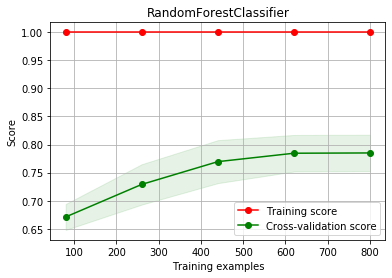

100% (1 of 1) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


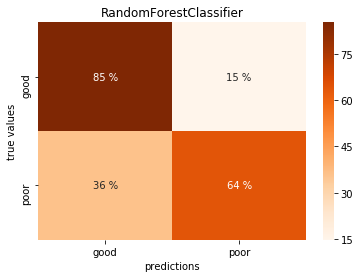

In [31]:
predictionTable_temp = testDifferentClassifiers(X_train, X_test, y_train, y_test, modelsToTest[11:12], show_learning_curve=True)
draw_confusion_matrix_for_good_poor(y_test.flatten(), predictionTable_temp[modelsToTest[11:12][0][0]], title=modelsToTest[11:12][0][0])

# draw_confusion_matrix_for_good_poor(y_test.flatten(), predictionTable["LogisticRegression"], title="LogisticRegression")
# draw_confusion_matrix_for_good_poor(y_test.flatten(), predictionTable["GaussianProcessClassifier"], title="GaussianProcessClassifier")
# draw_confusion_matrix_for_good_poor(y_test.flatten(), predictionTable["MLPClassifier"], title="MLPClassifier")
# draw_confusion_matrix_for_good_poor(y_test.flatten(), predictionTable["RandomForestClassifier"], title="RandomForestClassifier")
# draw_confusion_matrix_for_good_poor(y_test.flatten(), predictionTable["KNeighborsClassifier"], title="KNeighborsClassifier")

### samat testit PCA:n jälkeen

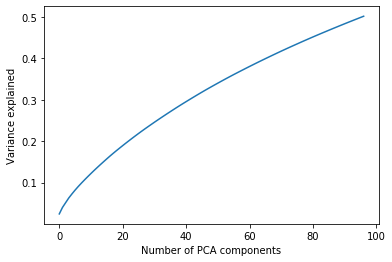

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
100% (1 of 1) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


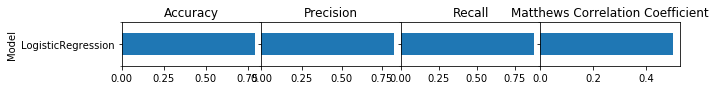

In [10]:
import warnings
warnings.filterwarnings(action='once')
from sklearn.decomposition import PCA
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Scaling data
scaler_X, scaler_y = StandardScaler(), StandardScaler()
scaler_X.fit(X_train), scaler_y.fit(y_train)
X_train_scaled, y_train_scaled = scaler_X.transform(X_train), scaler_y.transform(y_train)
X_test_scaled, y_test_scaled = scaler_X.transform(X_test), scaler_y.transform(y_test)

pca = PCA(0.5)
pca.fit(X_train_scaled)

# Plotting how large part of variance explained
explained = pca.explained_variance_ratio_.cumsum()

plt.plot(np.arange(len(explained)),explained)
plt.ylabel("Variance explained")
plt.xlabel("Number of PCA components")
plt.show()

X_train_pca, X_test_pca = pca.transform(X_train_scaled), pca.transform(X_test_scaled)
X_train_pca = np.array(X_train_pca)
X_test_pca = np.array(X_test_pca)

predictionTable = testDifferentClassifiers(X_train_pca, X_test_pca, y_train, y_test, modelsToTest)
scoresPCA = metricsClassification(predictionTable)
scoresPCA = scoresPCA.sort_values(by=['Accuracy'], ascending=False)
createGraphsFromScores(scoresPCA)

In [0]:
# plt.rcParams.keys()

## All rated "good"

In [19]:
newSeries = get_metrics_for_algorithm("-- All reviews graded good --", np.ones(len(y_test)) , y_test)
scores = add_or_replace_to_datafrema(newSeries.Model, scores, newSeries)
scores = scores.sort_values(by=['Accuracy'], ascending=False)
# print_scoretable(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


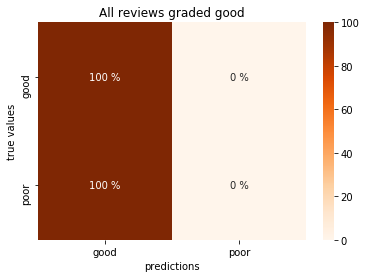

In [20]:
draw_confusion_matrix_for_good_poor(y_test.flatten(),np.ones(len(y_test)), title="All reviews graded good")

## Random guess

In [0]:
randomchoises = np.random.choice(a=[False, True], size=len(y_test))
newSeries = get_metrics_for_algorithm("-- Random guess --", randomchoises, y_test)
scores = add_or_replace_to_datafrema(newSeries.Model, scores, newSeries)
scores = scores.sort_values(by=['Accuracy'], ascending=False)

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


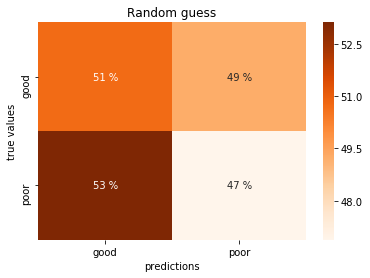

In [22]:
draw_confusion_matrix_for_good_poor(y_test.flatten(), randomchoises, title="Random guess")

## Kaikki tulokset taulukkona ja kuvana

In [23]:
print_scoretable(scores)

Model,Accuracy,AUC,MCC,Precision,Recall
"Fast.ai, ULMFiT",0.82,0.79,0.59,0.87,0.87
LogisticRegression,0.81,0.77,0.55,0.85,0.87
TextBlob Sentiment analysis,0.76,0.77,0.52,0.86,0.76
-- All reviews graded good --,0.68,nan,0,1,0.68
-- Random guess --,0.49,0.49,-0.022,0.51,0.67


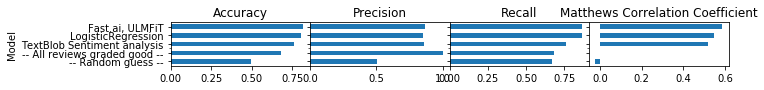

In [24]:
createGraphsFromScores(scores)

In [25]:
def color_negative_red(val):
    color = 'red' if val < 0.5 else 'green'
    return 'color: %s' % color
#predictionTable.T
#predictionTable.T.style.applymap(color_negative_red)
predictionTable.T.style.apply(lambda x: ["background: lightgreen" if v == x.iloc[0] else "" for v in x], axis = 0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
True value,1,0,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,1,0,1,0,0,1,0
LogisticRegression,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,0,0,1,0,0,0,1,1,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,1,1,0,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0
